# Collect axes and make big plot

This notebook is used to collect the output of all analyses which were ran for a single patient and to wrap all generated figures in a big plot which consists of multiple subplots. As with other notebooks which are needed to analyses single-subject data, this one uses the "tag" attribute of the cells to decide which cells should be not be ran in toolbox mode and which ones have to run in toolbox mode. This allows to convert them to .py scripts which can than be used by the src module.

### import modules

In [1]:
import os
import glob
import pickle

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

In [3]:
# after converstion to .py, we can use __file__ to get the module folder
try:
    thisDir = os.path.realpath(__file__)
# in notebook form, we take the current working directory (we need to be in 'notebooks/' for this!)
except:
    thisDir = '.'
# convert relative path into absolute path, so this will work with notebooks and py modules
supDir = os.path.abspath(os.path.join(os.path.dirname(thisDir), '..'))

supDir

'/data/martin/volume-wise-language'

### get data

In [4]:
MY_DIR = '../examples/'

In [5]:
p_name = 'pat###'

### collect plots

In [6]:
def get_plots(MY_DIR,p_name):
    subplot_dict = {}
    axes_list = glob.glob('%s%s*.png'%(MY_DIR,p_name))
    for a in axes_list:
        plot_name = a.split('_')[-1].split('.')[0]
        subplot_dict[plot_name] = a
    return subplot_dict

In [7]:
subplot_dict = get_plots(MY_DIR,p_name)

In [ ]:
subplot_dict

### outline of subplot arrangement

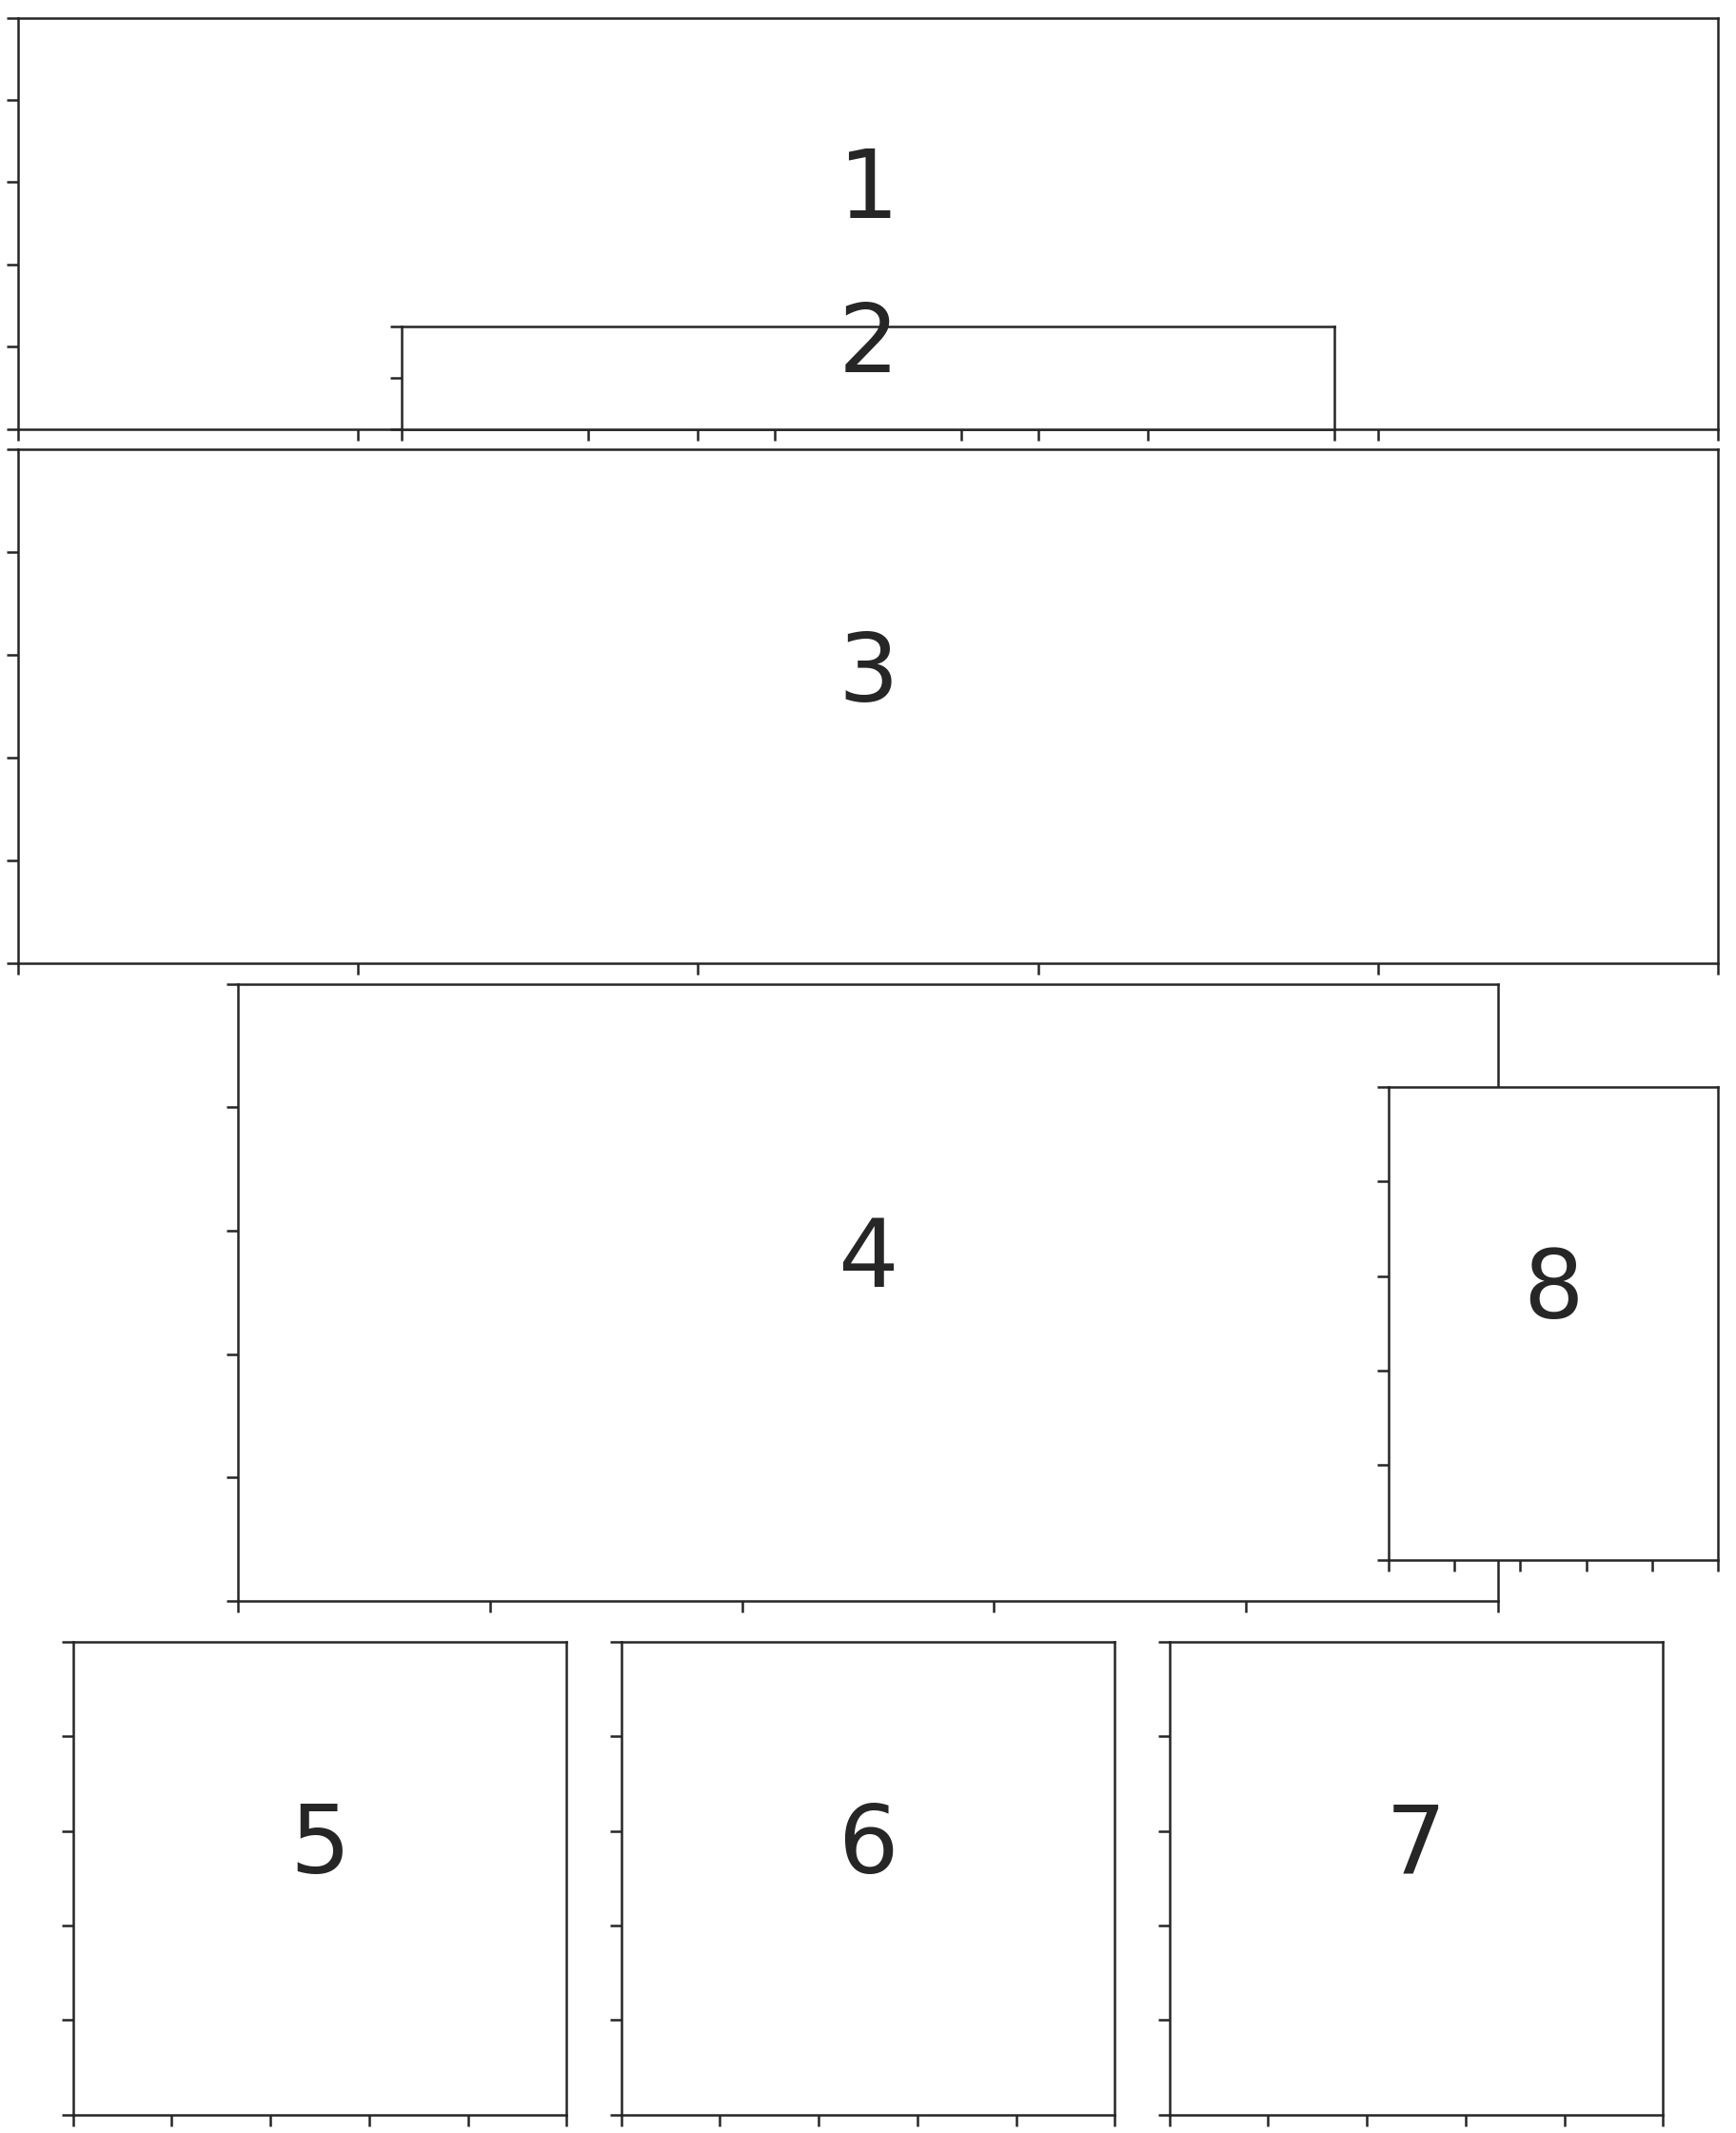

In [9]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_axes([0, 2.8, 1.55, 1.], xticklabels=[], yticklabels=[]);ax1.set_title(1,fontsize=100,y=0.5)
ax2 = fig.add_axes([0.35, 2.8, .85, .25], xticklabels=[], yticklabels=[]);ax2.set_title(2,fontsize=100,y=0.5)
ax3 = fig.add_axes([0, 1.5, 1.55, 1.25], xticklabels=[], yticklabels=[]);ax3.set_title(3,fontsize=100,y=0.5)
ax4 = fig.add_axes([0.2, -0.05, 1.15, 1.5], xticklabels=[], yticklabels=[]);ax4.set_title(4,fontsize=100,y=0.5)
ax5 = fig.add_axes([.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[]);ax5.set_title(5,fontsize=100,y=0.5)
ax6 = fig.add_axes([.55, -1.3, .45, 1.15], xticklabels=[], yticklabels=[]);ax6.set_title(6,fontsize=100,y=0.5)
ax7 = fig.add_axes([1.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[]);ax7.set_title(7,fontsize=100,y=0.5)
ax8 = fig.add_axes([1.25, 0.05, .3, 1.15], xticklabels=[], yticklabels=[]);ax8.set_title(8,fontsize=100,y=0.5)

plt.show()

### make a legend for all

In [10]:
colors_file = os.path.join(supDir,'models','colors.p')
with open(colors_file, 'rb') as f:
    color_dict = pickle.load(f)
    
my_cols = {}
for i, j in zip(['red', 'blue', 'yellow'], ['left', 'right', 'bilateral']):
    my_cols[j] = color_dict[i]

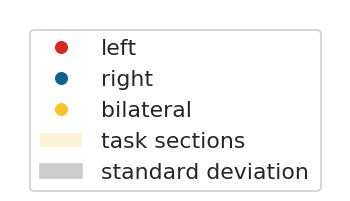

In [11]:
plt.figure(figsize=(5.6,3))
for group in my_cols.keys():
    plt.plot([-1,-1],'o',c=my_cols[group],label=group)
plt.bar(-1,-1,color=color_dict['trans'],label='task sections')
plt.bar(-1,-1,color=color_dict['black'],alpha=0.2,label='standard deviation')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(0, 0., 1, 1),mode='expand')
plt.xticks([])
plt.yticks([])
sns.despine(left=True,bottom=True)
plt.savefig('%slegend.png'%MY_DIR,dpi=300,bbox_inches='tight')
plt.show()

### fill subplots with content

In [12]:
sns.set_style('dark')

In [13]:
subplot_dict.keys()

dict_keys(['donut', 'logFunc', 'predSpace', 'timeAll200trs', 'timeCycle20trs', 'tMapBrain', 'tMapCbar'])

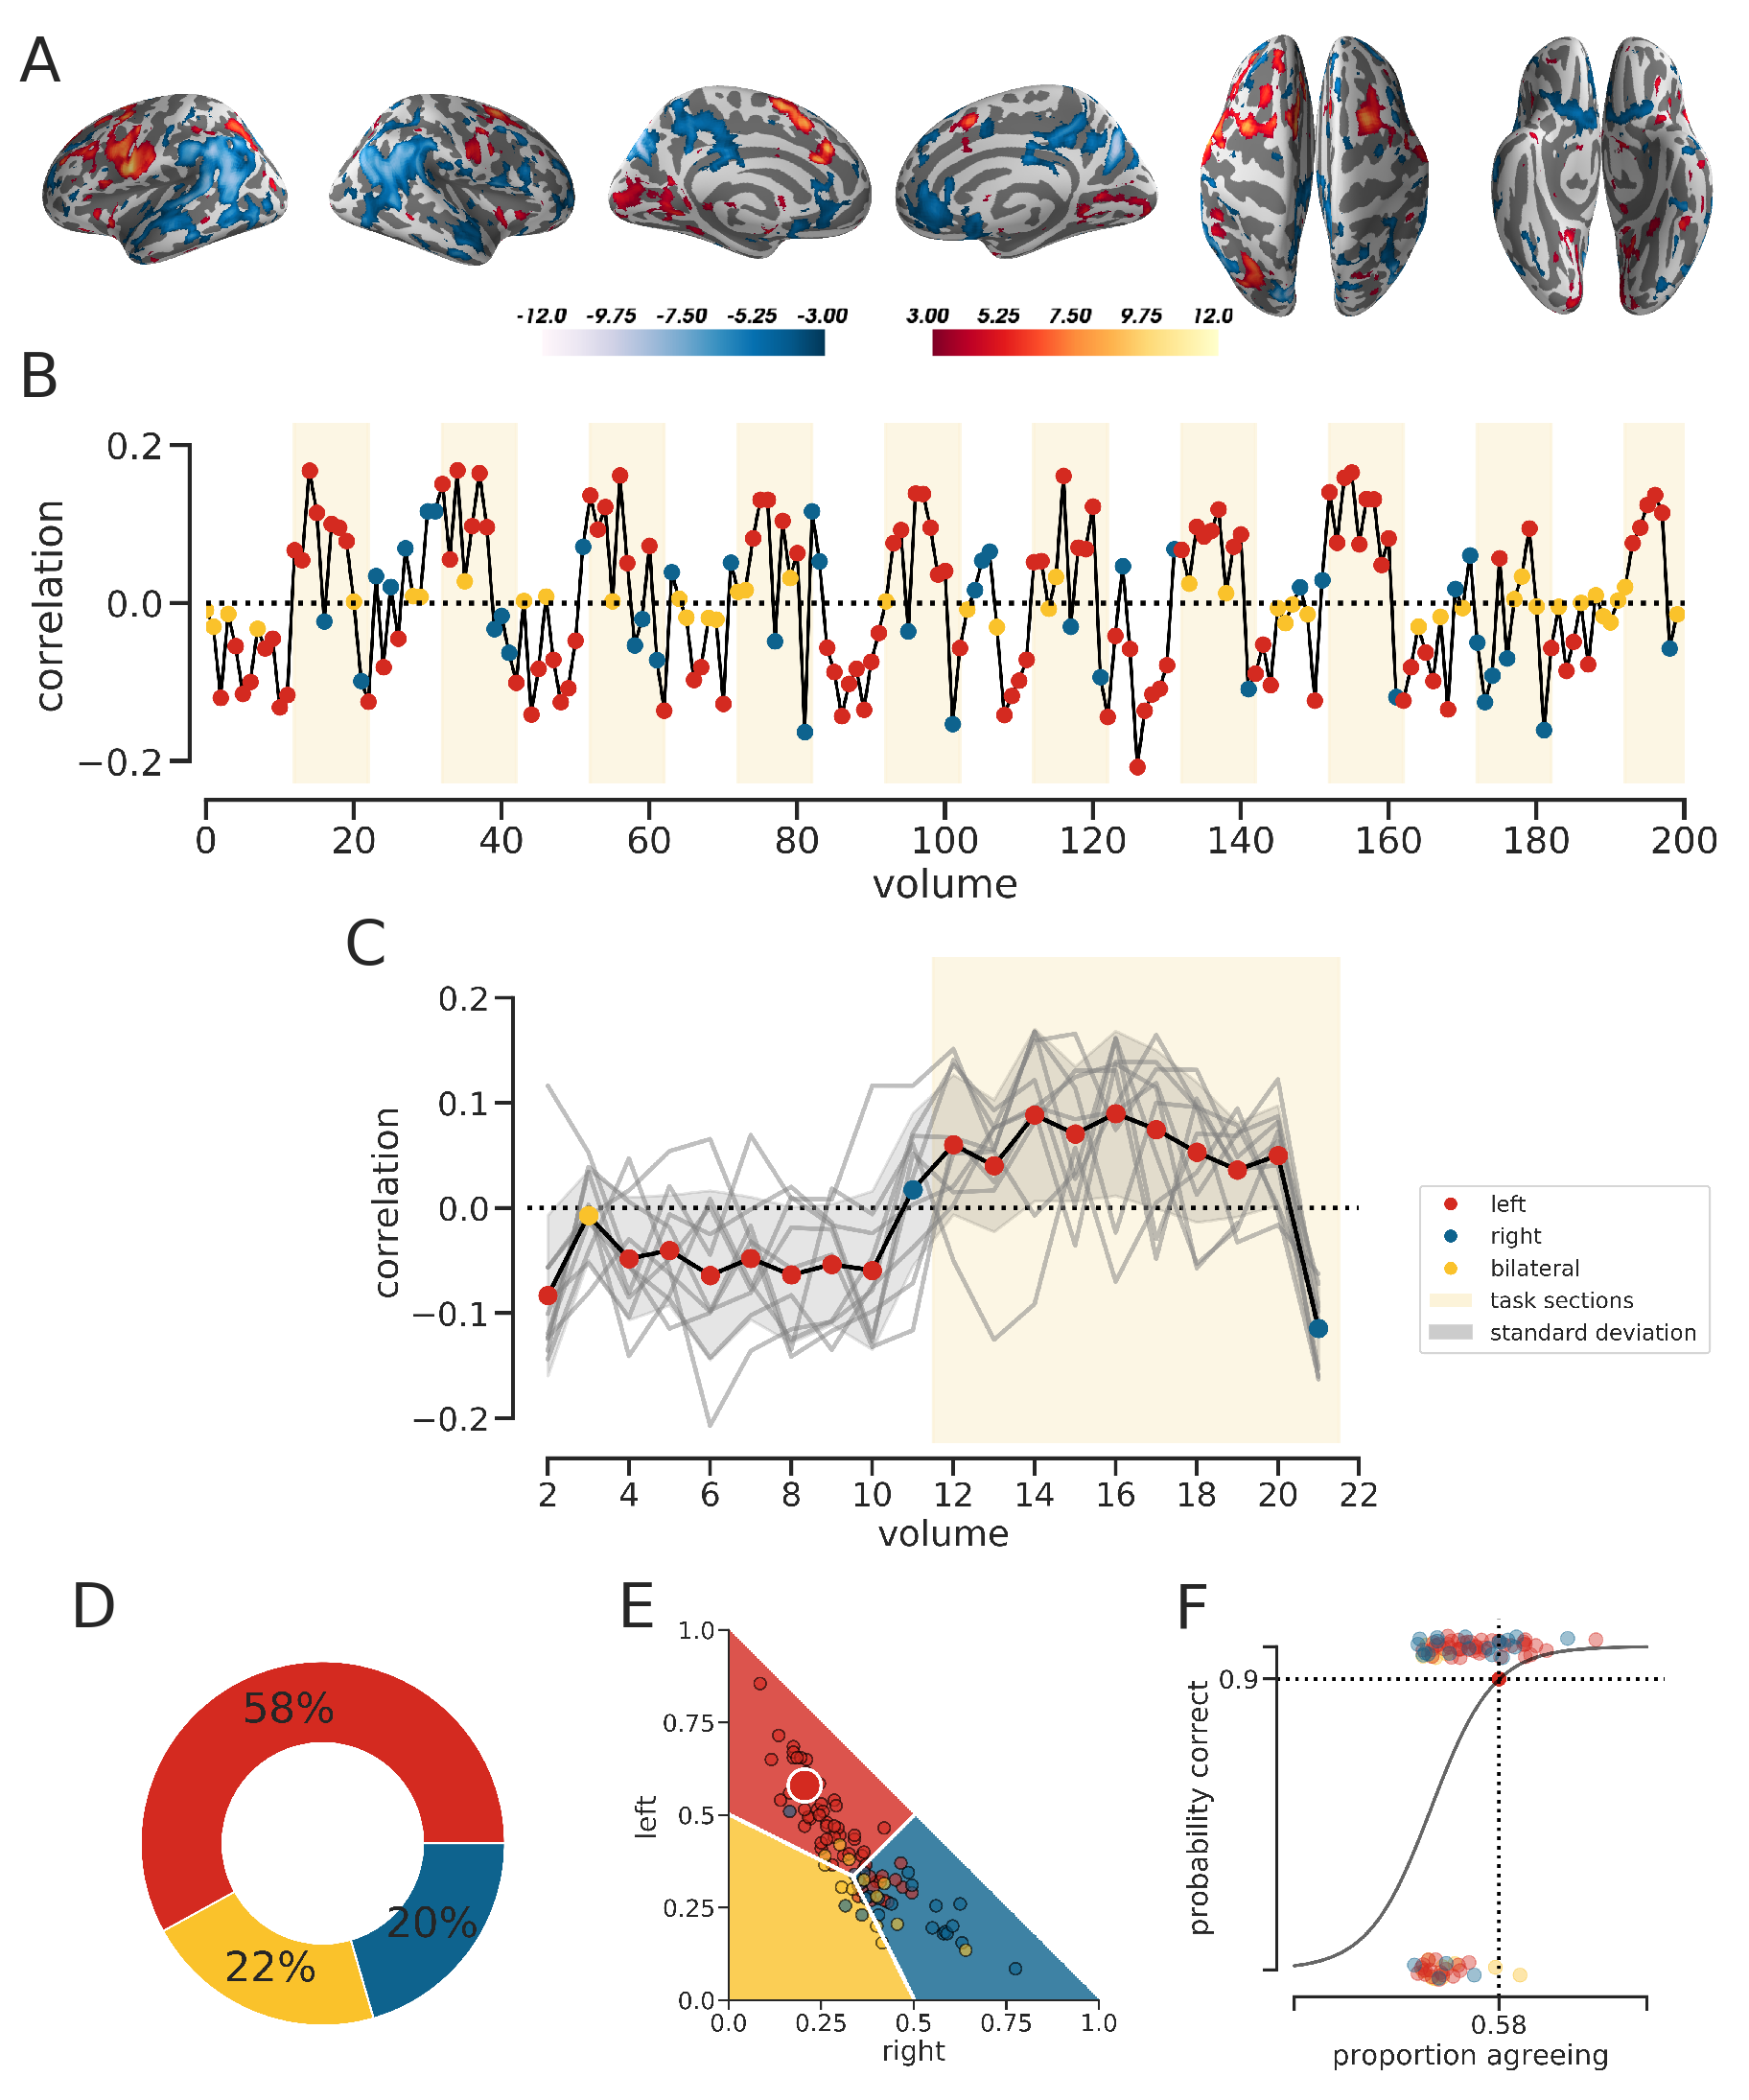

In [19]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_axes([0, 2.8, 1.55, 1.], xticklabels=[], yticklabels=[])
ax1.imshow(Image.open(subplot_dict['tMapBrain']))

ax2 = fig.add_axes([0.45, 2.8, .65, .25], xticklabels=[], yticklabels=[])
ax2.imshow(Image.open(subplot_dict['tMapCbar']))

ax3 = fig.add_axes([0, 1.5, 1.55, 1.25], xticklabels=[], yticklabels=[])
ax3.imshow(Image.open(subplot_dict['timeAll200trs']))

ax4 = fig.add_axes([0.2, -0.05, 1.15, 1.5], xticklabels=[], yticklabels=[])
ax4.imshow(Image.open(subplot_dict['timeCycle20trs']))

ax5 = fig.add_axes([.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
ax5.imshow(Image.open(subplot_dict['donut']))

ax6 = fig.add_axes([.55, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
ax6.imshow(Image.open(subplot_dict['predSpace']))

ax7 = fig.add_axes([1.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
ax7.imshow(Image.open(subplot_dict['logFunc']))

ax8 = fig.add_axes([1.25, 0.05, .3, 1.25], xticklabels=[], yticklabels=[])
ax8.imshow(Image.open('../examples/legend.png'))

plt.text(0, 0.8, 'A',transform=ax1.transAxes, fontsize=64)
plt.text(0, -0.2, 'B',transform=ax1.transAxes, fontsize=64)
plt.text(0.19, -2, 'C',transform=ax1.transAxes, fontsize=64)
plt.text(0.03, -4.1, 'D',transform=ax1.transAxes, fontsize=64)
plt.text(0.35, -4.1, 'E',transform=ax1.transAxes, fontsize=64)
plt.text(0.675, -4.1, 'F',transform=ax1.transAxes, fontsize=64)

plt.savefig('../reports/figures/16-individual-example-plot.png',dpi=300,bbox_inches='tight')

plt.show()

#### toolbox use

In [15]:
#legend_filename = os.path.join(supDir,'visualization','legend.png')

In [16]:
#def make_p(pFolder,pName,legend_filename=legend_filename):
#    
#    subplot_dict = get_plots(pFolder,pName)
#
#    fig = plt.figure(figsize=(16, 6))
#
#    ax1 = fig.add_axes([0, 1.5, 1.55, 1.25], xticklabels=[], yticklabels=[])
#    ax1.imshow(Image.open(subplot_dict['timeAll200trs']))
#
#    ax2 = fig.add_axes([0.2, -0.05, 1.15, 1.5], xticklabels=[], yticklabels=[])
#    ax2.imshow(Image.open(subplot_dict['timeCycle20trs']))
#
#    ax3 = fig.add_axes([.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
#    ax3.imshow(Image.open(subplot_dict['donut']))
#
#    ax4 = fig.add_axes([.55, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
#    ax4.imshow(Image.open(subplot_dict['predSpace']))
#
#    ax5 = fig.add_axes([1.05, -1.3, .45, 1.15], xticklabels=[], yticklabels=[])
#    ax5.imshow(Image.open(subplot_dict['logFunc']))
#
#    ax6 = fig.add_axes([1.25, 0.05, .3, 1.25], xticklabels=[], yticklabels=[])
#    ax6.imshow(Image.open(legend_filename))
#
#    plt.suptitle(pName,fontsize=48,x=0.75,y=2.95)
#    
#    out_name = os.path.join(pFolder,''.join([pName,'_all.png']))
#    plt.savefig(out_name,dpi=300,bbox_inches='tight') 
#    plt.close()
#    
#    return out_name

### summary

Seeing the results on the level of N=1 allows to get a more in-depth perspective on the data and on the robustness of the analyses in the single case. Most of the plots generated here allow to combine prospectively collected data with the original dataset which was used to train the models. Some of the plots only make sense on the single-subject level, for example the volume-wise classification on the time course could not be represented in an intelligible way on the group level. Also, using a doughnut plot only makes sense on the individual level. The different ways of visualizing the data contain some amount of redundancy, but in a clinical context/for an application this might be useful to look for (in)consistencies and look at the same dataset from varying points of view.


**************

< [Previous](15-mw-visualize-logistic-regression.ipynb) | [Contents](00-mw-overview-notebook.ipynb)